# Predicting Breast Cancer in Women

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not a breast tumor is malignant or benign

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modeling

Our dataset through kaggle. Here is the [dataset](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset)

## Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('breast-cancer.csv')
df.head().T

,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130.0,77.58,135.1
area_mean,1001.0,1326.0,1203.0,386.1,1297.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


## 1. Problem Definition

We want to create a model from a given dataset that will help us to predict, based upon certain features, if a patient likely has breast cancer or not.

## 2. Data

### Learning the data

In [4]:
df.diagnosis.value_counts(), df.diagnosis.value_counts(normalize=True)

(diagnosis
 B    357
 M    212
 Name: count, dtype: int64,
 diagnosis
 B    0.627417
 M    0.372583
 Name: proportion, dtype: float64)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [8]:
df['diagnosis'] = pd.Categorical(df['diagnosis'], categories=['B', 'M']).codes

df.head(20)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


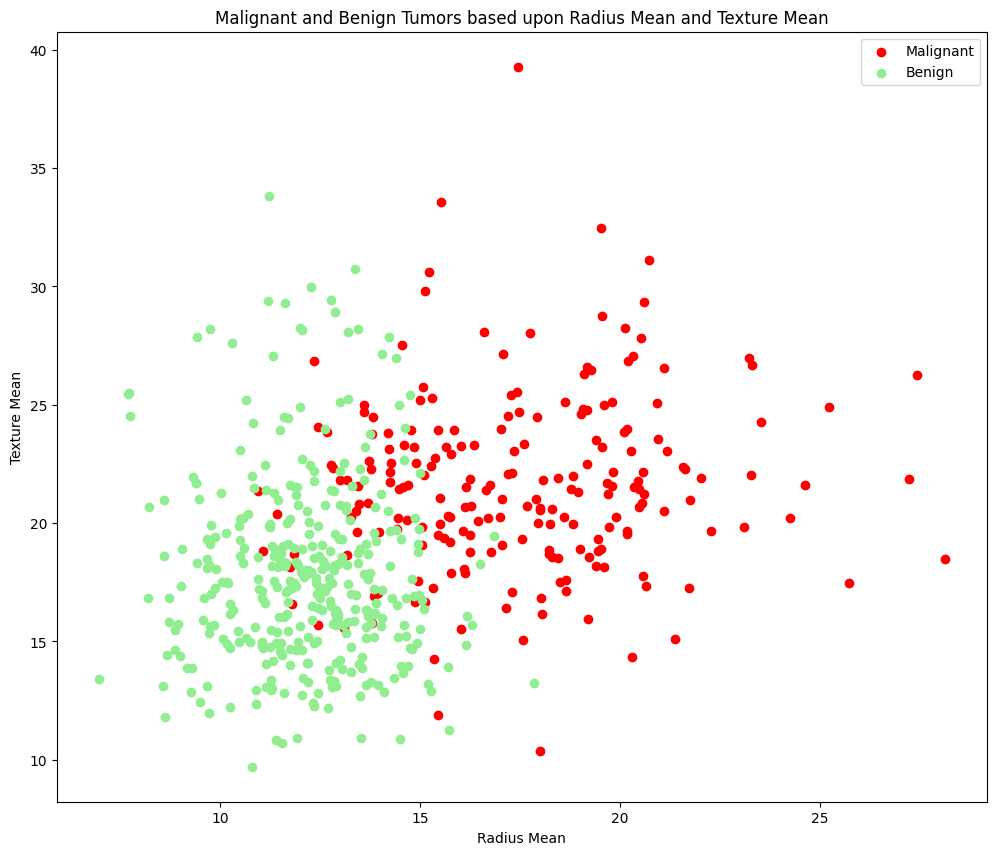

In [9]:
fig, ax = plt.subplots(figsize=(12, 10))

ax.scatter(df.radius_mean[df.diagnosis == 1],
           df.texture_mean[df.diagnosis == 1],
           color='red')

ax.scatter(df.radius_mean[df.diagnosis == 0],
           df.texture_mean[df.diagnosis == 0],
           color='lightgreen')

plt.title('Malignant and Benign Tumors based upon Radius Mean and Texture Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.legend(['Malignant', 'Benign']);

### Separating the Data into X and y then train and test

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop('diagnosis', axis=1)
y = df.diagnosis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 3. Evaluation

We are going to use the Accuracy metric to evaluate our success

## 4. Features

Kaggle did not provide a feature dictionary, so here is one that I created by prompting ChatGPT

In [11]:
# feature_dictionary = {col: '' for col in df.columns}
# feature_dictionary

feature_dictionary = {
  "id": "A unique ID assigned to each patient.",
  "diagnosis": "The target variable indicating whether a tumor is malignant (cancerous) or benign (not cancerous). This is the column that we will be trying to predict using machine learning algorithms.",
  "radius_mean": "Mean of distances from center to points on the perimeter of the tumor.",
  "texture_mean": "Standard deviation of gray-scale values.",
  "perimeter_mean": "Mean size of the core tumor.",
  "area_mean": "Mean area of the tumor.",
  "smoothness_mean": "Mean of local variation in radius lengths.",
  "compactness_mean": "Mean of perimeter^2 / area - 1.0.",
  "concavity_mean": "Mean of severity of concave portions of the contour.",
  "concave points_mean": "Mean for number of concave portions of the contour.",
  "symmetry_mean": "Mean symmetry of cell nuclei.",
  "fractal_dimension_mean": "Mean 'coastline approximation' based on image segmentation.",
  "radius_se": "Standard error of mean of distances from center to points on the perimeter.",
  "texture_se": "Standard error of gray-scale values.",
  "perimeter_se": "Standard error of size of the core tumor.",
  "area_se": "Standard error of area of the tumor.",
  "smoothness_se": "Standard error of local variation in radius lengths.",
  "compactness_se": "Standard error of perimeter^2 / area - 1.0.",
  "concavity_se": "Standard error for severity of concave portions of the contour.",
  "concave points_se": "Standard error for number of concave portions of the contour.",
  "symmetry_se": "Standard error for symmetry of cell nuclei.",
  "fractal_dimension_se": "Standard error for 'coastline approximation' based on image segmentation.",
  "radius_worst": "Worst or largest mean of distances from center to points on the perimeter.",
  "texture_worst": "Worst or largest standard deviation of gray-scale values.",
  "perimeter_worst": "Worst or largest mean size of the core tumor.",
  "area_worst": "Worst or largest mean area of the tumor.",
  "smoothness_worst": "Worst or largest mean of local variation in radius lengths.",
  "compactness_worst": "Worst or largest mean of perimeter^2 / area - 1.0.",
  "concavity_worst": "Worst or largest mean of severity of concave portions of the contour.",
  "concave points_worst": "Worst or largest mean for number of concave portions of the contour.",
  "symmetry_worst": "Worst or largest mean symmetry of cell nuclei.",
  "fractal_dimension_worst": "Worst or largest mean 'coastline approximation' based on image segmentation."
}


## 5. Modeling

### Choosing a model

In [12]:
len(df)

569

Because our DataFrame has less than 100K entries, the first model we are going to try a few different models and see how they do out of the box

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import cross_val_score

np.random.seed(42)

def print_scores(model):
  scoring = ['precision', 'recall', 'f1', 'accuracy']
  for method in scoring:
    score = np.mean(cross_val_score(model, X, y, cv=5, scoring=method))
    print(f"\t {method}: {score * 100:.2f}%")

def evaluate_models():
  models = [RandomForestClassifier(), KNeighborsClassifier()]

  for model in models:
    print(f"Results for {str(model)}")
    print_scores(model)

evaluate_models()


Results for RandomForestClassifier()
	 precision: 96.16%
	 recall: 92.97%
	 f1: 94.50%
	 accuracy: 95.78%
Results for KNeighborsClassifier()
	 precision: 10.97%
	 recall: 25.19%
	 f1: 15.11%
	 accuracy: 27.30%


/Users/willbowdler/Desktop/Python/Data Analysis/Breast Cancer Prediction/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Tuning the hyperparameters on our chosen model

Because RandomForestClassifier performed the best, we are going to tune its hyperparameters to see if we can get an even better result.



In [29]:
from sklearn.model_selection import GridSearchCV

rf_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


rf_model = GridSearchCV(estimator=RandomForestClassifier(),
                        param_grid=rf_grid,
                        cv=5,
                        verbose=True)

rf_model.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 500]},
             verbose=True)

In [30]:
rf_model.best_params_

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [33]:
rf_model = RandomForestClassifier(n_estimators=500,
                                  min_samples_leaf=1,
                                  min_samples_split=2, 
                                  max_depth=15,
                                  random_state=42)

print_scores(rf_model)

	 precision: 96.22%
	 recall: 93.43%
	 f1: 94.75%
	 accuracy: 96.14%


We did have an improvement: These are the old scores for RandomForest Classifier:

Results for RandomForestClassifier()
* precision: 96.16%
* recall: 92.97%
* f1: 94.50%
* accuracy: 95.78%

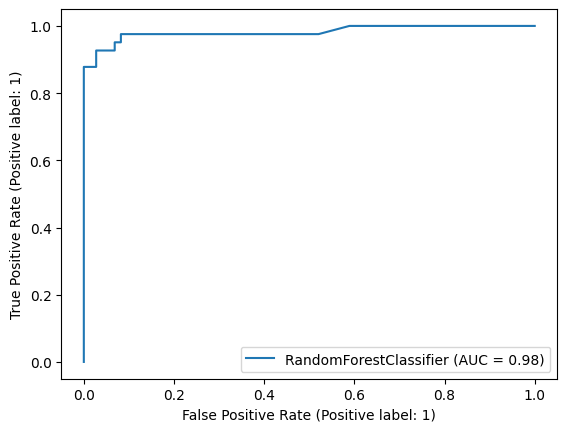

In [37]:
from sklearn.metrics import RocCurveDisplay
rf_model.fit(X_train, y_train)

RocCurveDisplay.from_estimator(rf_model, X_test, y_test)

<Axes: >

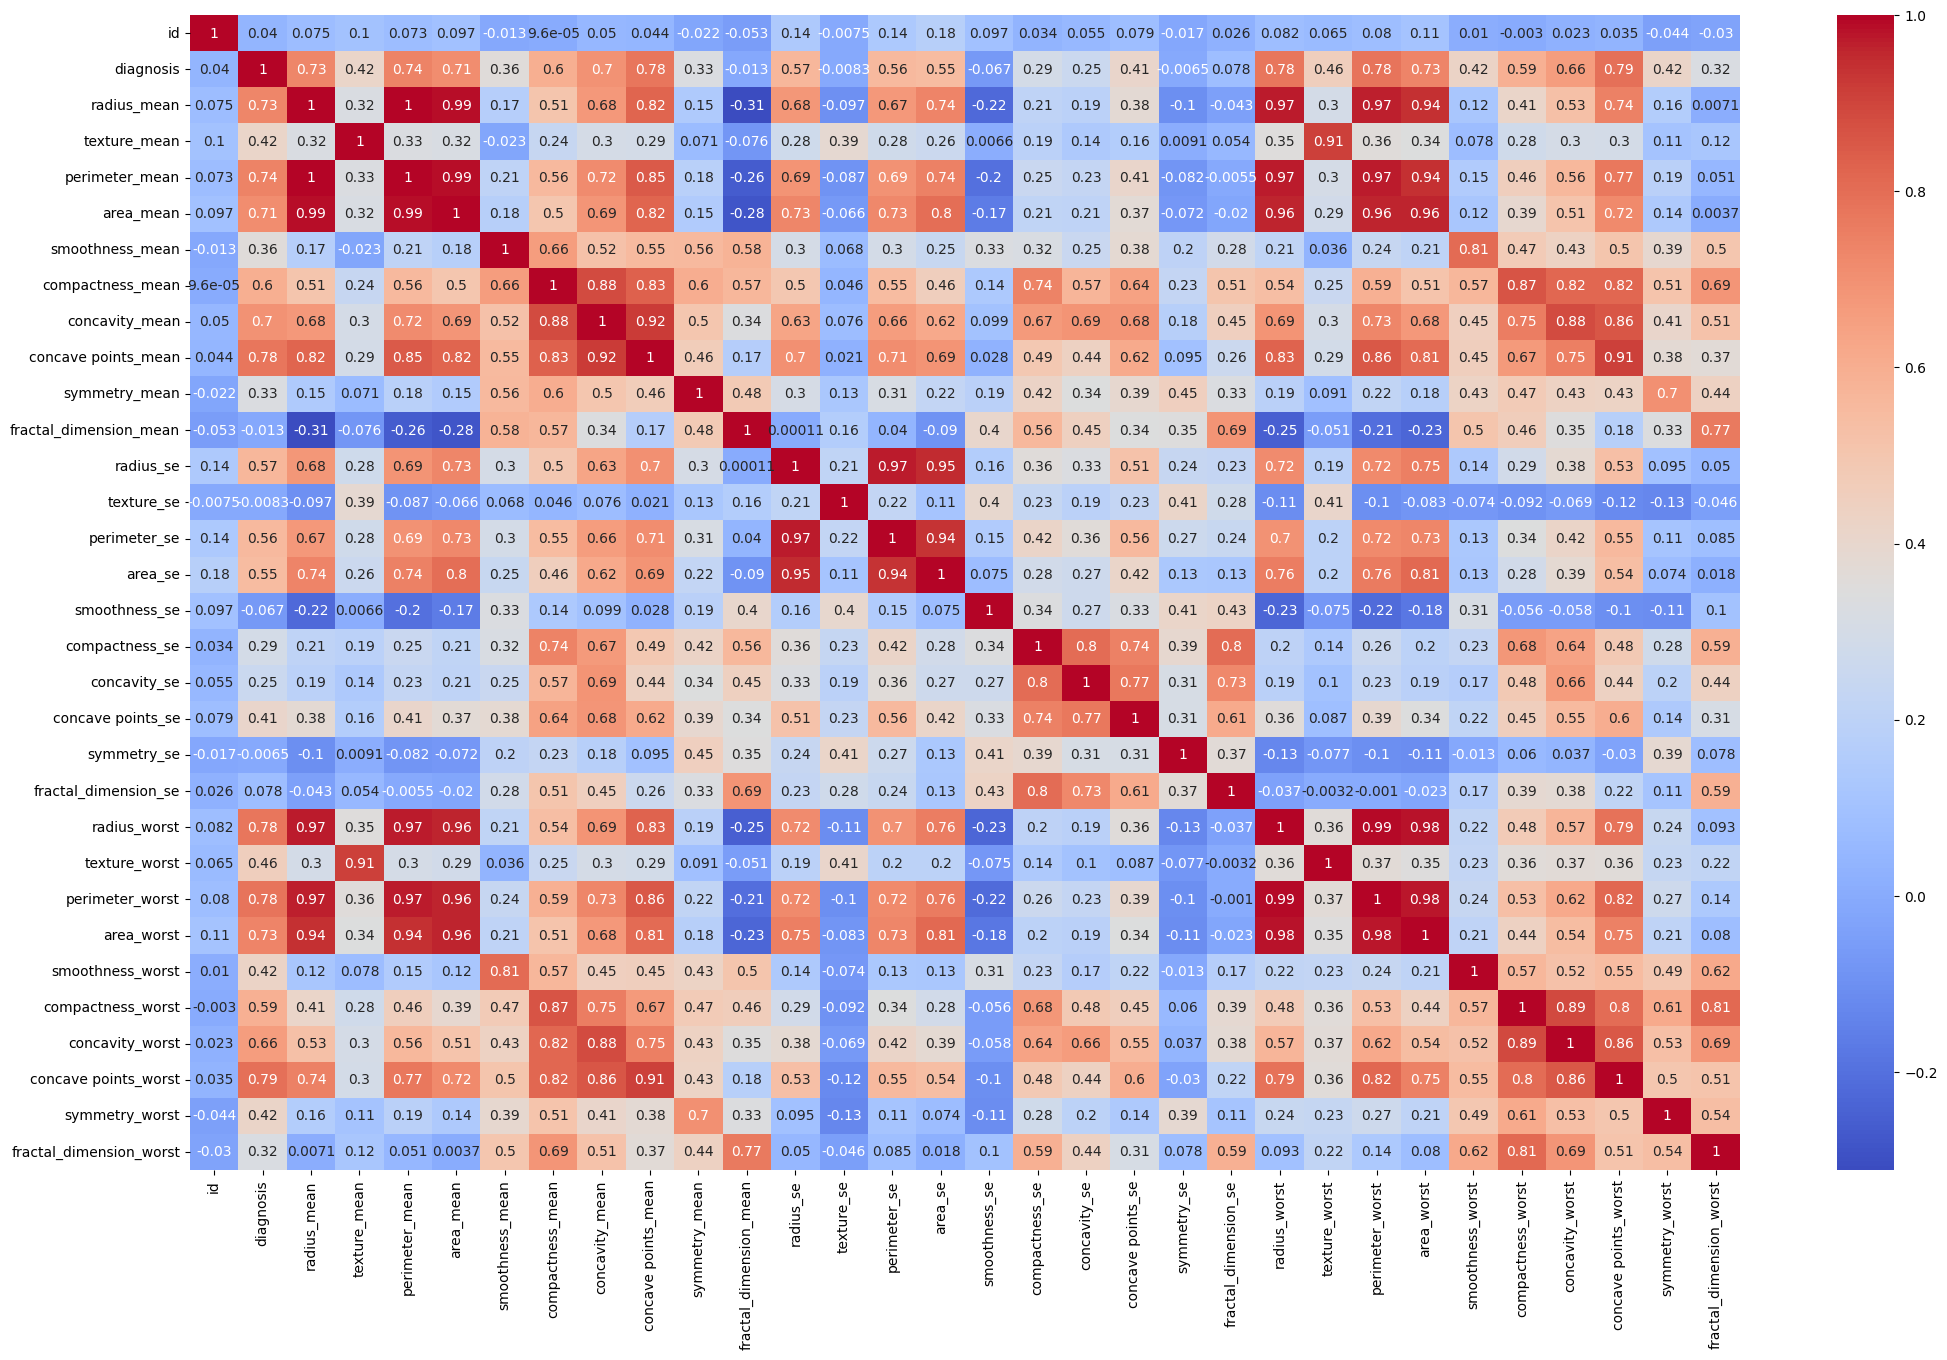

In [45]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", ax=ax)
